Let's first setup our imports

In [102]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
%matplotlib inline

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [103]:
iris = datasets.load_iris()

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [104]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.DataFrame(iris.target)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

In [55]:
import seaborn as sns

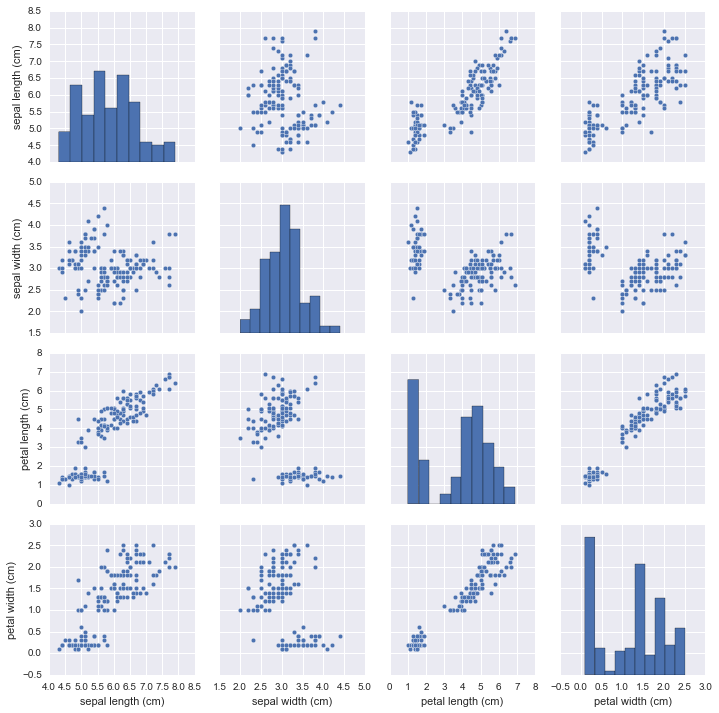

In [58]:
sns.pairplot(X)

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [59]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Compute the labels and centroids

In [60]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print labels
print centroids

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


In [61]:
#predY = np.choose(labels, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(np.int64)

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

Plot the predicted vs actual classifcations to see how our clustering analysis compares

Check the centroids to see where each cluster is lying 

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

In [62]:
metrics.accuracy_score(labels, y)

0.23999999999999999

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [63]:
metrics.silhouette_score(y, labels, metric="euclidean")

0.70172421600536772

Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [64]:
print metrics.classification_report(y,labels)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.95      0.72      0.82        50

avg / total       0.32      0.24      0.27       150



Compute the Confusion Matrix to test the performance of the clustering analysis

In [65]:
metrics.confusion_matrix(y, labels)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

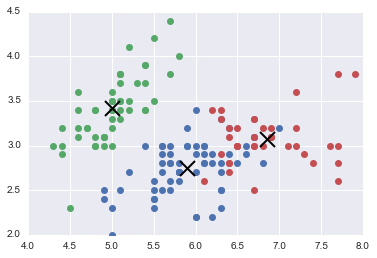

In [69]:
for i in range(k):
    ds=iris.data[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1], "o")
    lines =plt.plot(centroids[i,0],centroids[i,1],"kx")
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

In [79]:
colormap = np.array(["red","blue", "yellow"])

ValueError: to_rgba: Invalid rgba arg "['red']"
length of rgba sequence should be either 3 or 4

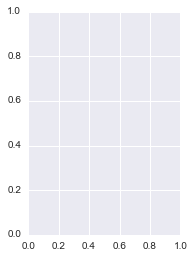

In [105]:
plt.subplot(1,2,1)
plt.scatter(X["petal length (cm)"],X["petal width (cm)"], c=colormap[y], s=40)
plt.title("Actual Classification")

plt.subplot(1,2,2)
plt.scatter(X["petal length (cm)"],X["petal width (cm)"], c=colormap[labels], s=40)
plt.title("K-Mean Classification")